# **<span style="color:red">Imports</span>**

In [ ]:
# Handy arrays
import numpy as np

# FFTs
import scipy.fft as fft
import scipy.fftpack as fftp

# Custom modules
import lib.utils.utils as Utils
import lib.utils.plotting as Plotting
import lib.utils.otf as OTF
import lib.methods.tikhonov_rgb as Restoration
import lib.phd.sample_presets as SamplePresets

# <span style="color:red">**Reconstruction of real samples**</span>

## <span style="color:orange">**Samples init**</span>

### <span>**Samples**</span>

In [ ]:
image = Utils.image_load('Samples/Samples Fundus/1/До.jpg', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10/11, 10)
sample_preset_1 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PHD)/Sample_1/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.004, 505,
                                             [0.5, 1.3], 54, 100)

In [ ]:
image = Utils.image_load('Samples/Samples Fundus/1/После.jpg', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10/11, 10)
sample_preset_2 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PHD)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

In [ ]:
image = Utils.image_load('Samples/Samples Fundus/3/После.jpg', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10/11, 10)
sample_preset_3 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PHD)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

In [ ]:
image = Utils.image_load('Samples/Samples Fundus/3/После.jpg', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10/11, 10)
sample_preset_4 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PHD)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

In [ ]:
image = Utils.image_load('Samples/Samples Fundus/1/1.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset_5 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PHD)/Sample_1/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.004, 505,
                                             [0.5, 1.3], 54, 100)

In [ ]:
image = Utils.image_load('Samples/Samples Fundus/1/2.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset_6 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PHD)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

In [4]:
# Sample choice
selected_sample = sample_preset_6

### <span>**Detector Functions**</span>

In [ ]:
Plotting.plot_functions([Plotting.FuncDesc(selected_sample.detector_funcs[0], selected_sample.detector_funcs[1], r'$s_{0}(\lambda)$', 'r'),
                         Plotting.FuncDesc(selected_sample.detector_funcs[0], selected_sample.detector_funcs[2], r'$s_{1}(\lambda)$', 'g'),
                         Plotting.FuncDesc(selected_sample.detector_funcs[0], selected_sample.detector_funcs[3], r'$s_{2}(\lambda)$', 'b')],
                        x_axis_name=r'$\lambda, nm$', plot_file=selected_sample.sample_folder + '2-1.svg')

### <span>**Image**</span>

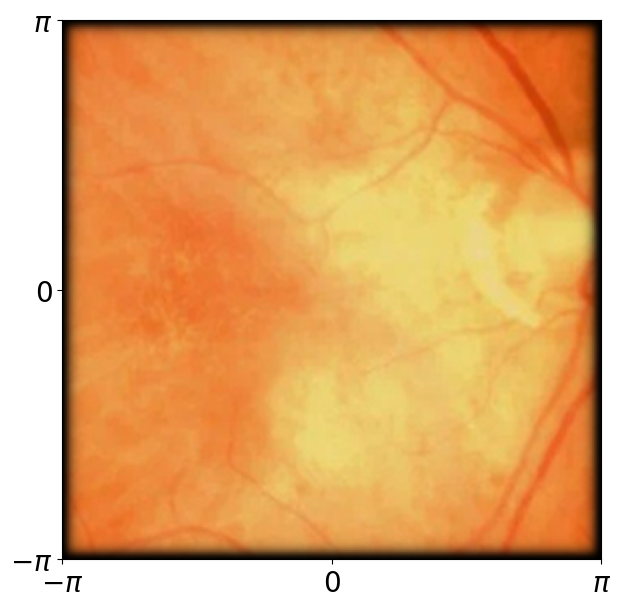

In [8]:
Plotting.plot_image(selected_sample.image)

In [ ]:
Utils.image_save(Utils.image_crop_corners(selected_sample.image), selected_sample.sample_folder + '3, observed.png', mode='rgb')

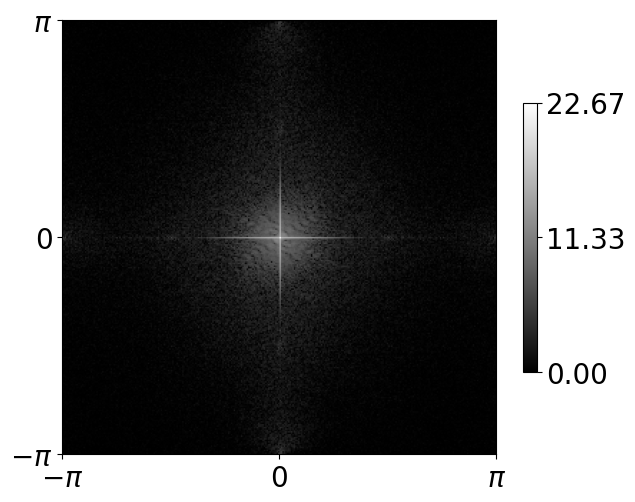

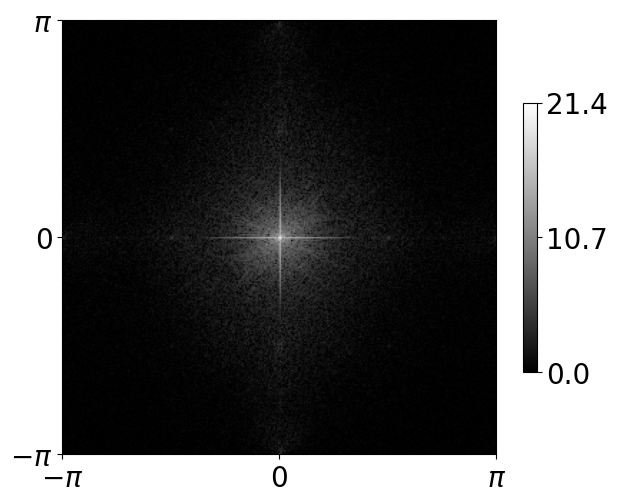

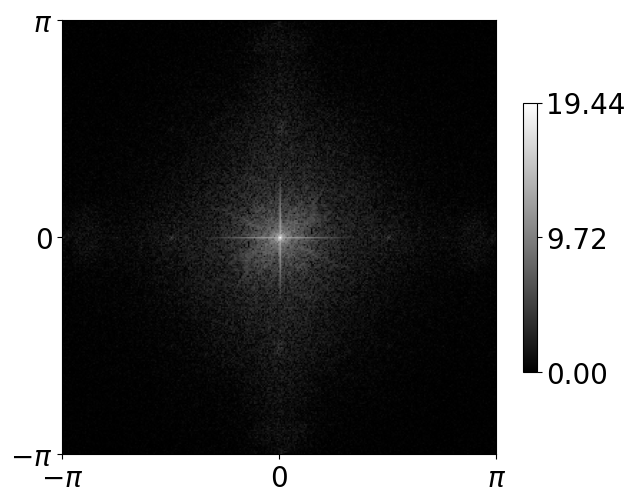

In [6]:
Plotting.plot_spectrum(selected_sample.image[:,:,0])
Plotting.plot_spectrum(selected_sample.image[:,:,1])
Plotting.plot_spectrum(selected_sample.image[:,:,2])

## <span style="color:orange">**OTF batch**</span>

In [5]:
otf_batch = OTF.create_otf_batch(selected_sample.image.shape[0:2], selected_sample.image_rgb_ratios,
                                 selected_sample.detector_funcs, selected_sample.defocus_a, selected_sample.focus_wlength)

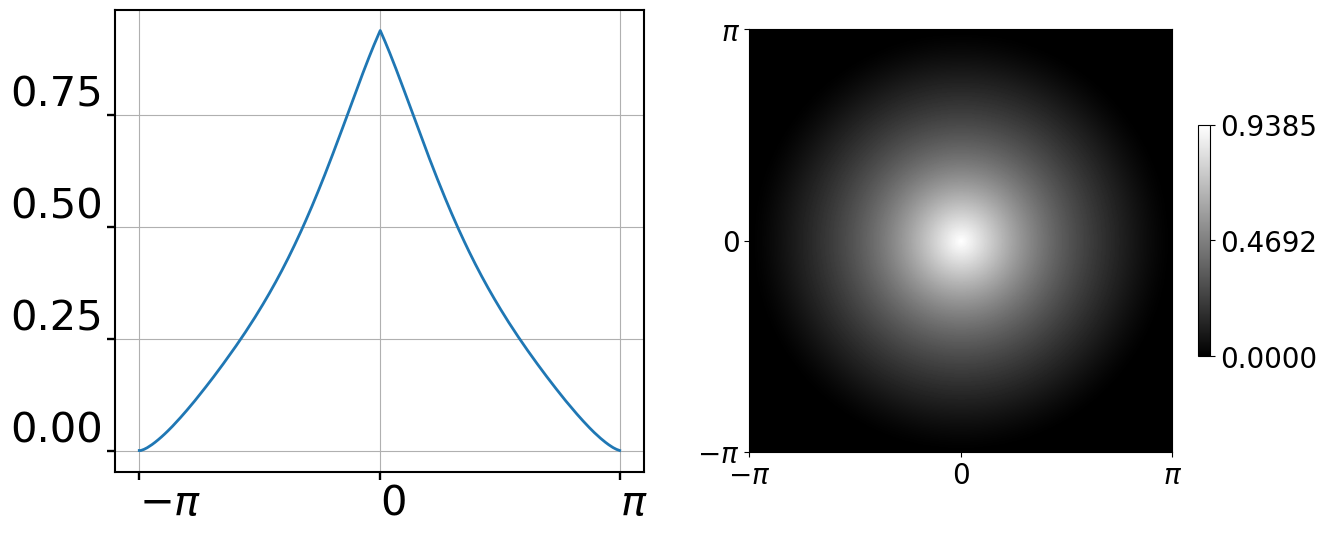

In [6]:
Plotting.plot_image(fftp.fftshift(otf_batch[0,0,:,:].real), plot_cut=True, cut_index=selected_sample.image.shape[0]//2, y_axis_position=-0.5)#,
                    #plot_file=selected_sample.sample_folder + '2-2.svg')

## **<span style="color:orange">Image restoration</span>**

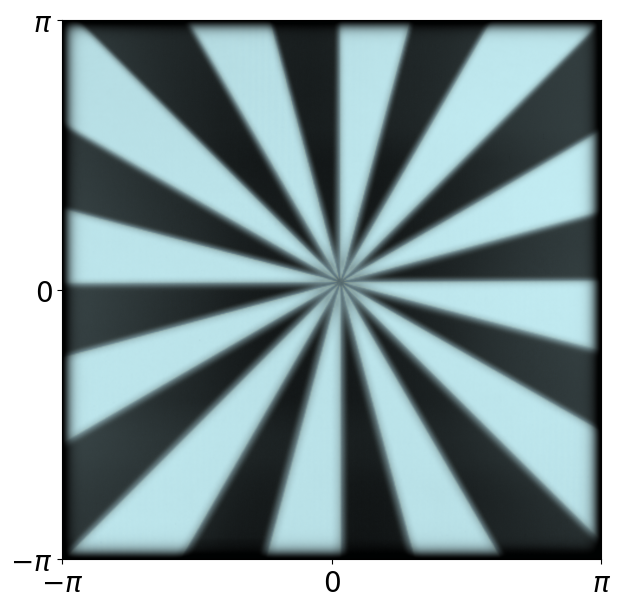

In [ ]:
image_restored, nev_norm = Restoration.tikhonov_regularization_method_rgb(selected_sample.image, otf_batch, selected_sample.mu, selected_sample.k0)
Plotting.plot_image(image_restored)

In [ ]:
Utils.image_save(Utils.image_crop_corners(image_restored), selected_sample.sample_folder + '5, restored.png', mode='rgb')

## **<span style="color:orange">Number of iterations</span>**

In [ ]:
from lib.methods.otf_restoration import get_lower_envelope

In [ ]:
iters = np.arange(1, selected_sample.max_iters + 1)

In [ ]:
image_restored, nev_norm = Restoration.tikhonov_regularization_method_rgb(selected_sample.image, otf_batch, selected_sample.mu, -selected_sample.max_iters)

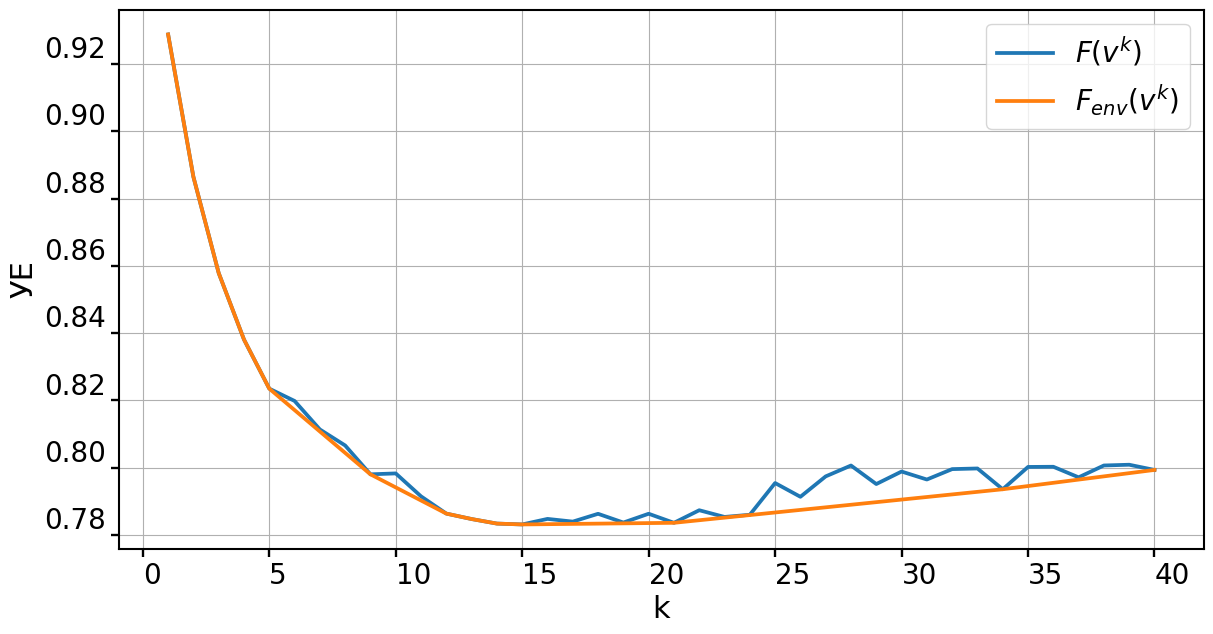

In [ ]:
Plotting.plot_functions([Plotting.FuncDesc(iters, nev_norm, r'$F(v^{k})$'),
                         Plotting.FuncDesc(iters, get_lower_envelope(iters, nev_norm), r'$F_{env}(v^{k})$')], x_axis_name='k',
                         plot_file=selected_sample.sample_folder + 'iter_num.svg')

In [ ]:
def minimise_functional(functional_values, segment_splitting):
    return segment_splitting[np.argmin(functional_values)]

In [ ]:
min_iters = minimise_functional(get_lower_envelope(iters, nev_norm), iters)
print(min_iters)

50
